In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import quandl

quandl.ApiConfig.api_key = 'hCqdsmePG46P8QzDa3KT' # as soon as you sign up on https://www.quandl.com, you will get an API key 

# get stock data

data1 = quandl.get('WIKI/CLX') # use your favorite stock symbol, e.g., AAPL

data1.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1983-03-21,28.88,29.25,28.12,29.25,107000.0,0.0,1.0,1.558141,1.578104,1.517138,1.578104,856000.0
1983-03-22,29.38,29.50,29.12,29.38,152300.0,0.0,1.0,1.585117,1.591592,1.571090,1.585117,1218400.0
1983-03-23,29.66,29.75,29.38,29.62,60900.0,0.0,1.0,1.600224,1.605080,1.585117,1.598066,487200.0
1983-03-24,29.38,29.75,29.00,29.62,116700.0,0.0,1.0,1.585117,1.605080,1.564616,1.598066,933600.0
1983-03-25,28.88,29.50,28.00,29.12,127700.0,0.0,1.0,1.558141,1.591592,1.510663,1.571090,1021600.0


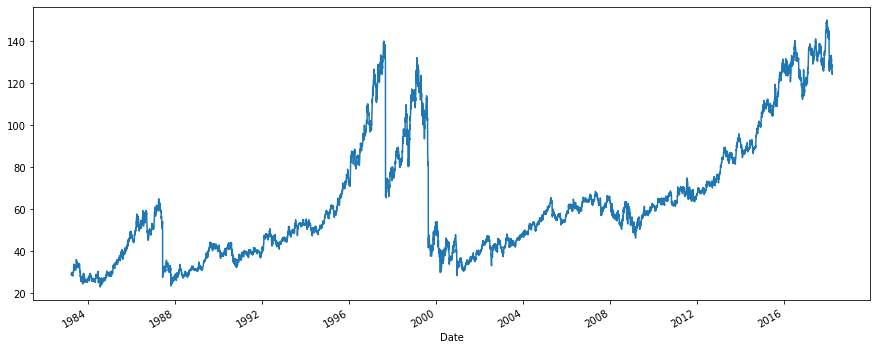

In [4]:
y = data1['Open']
y.plot(figsize=(15, 6))
plt.show()

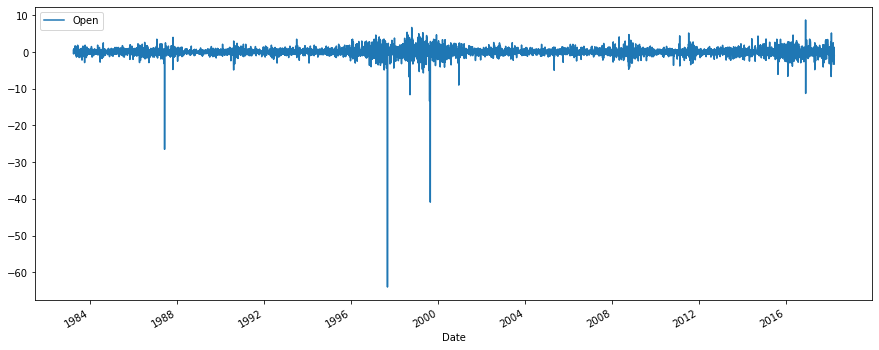

In [5]:
diffed_y = pd.DataFrame(y.diff().dropna())

type(diffed_y)
diffed_y.plot(figsize=(15, 6))
plt.show()

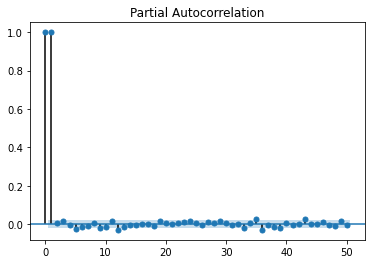

In [6]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
plot_pacf(y, lags=50)
pyplot.show()

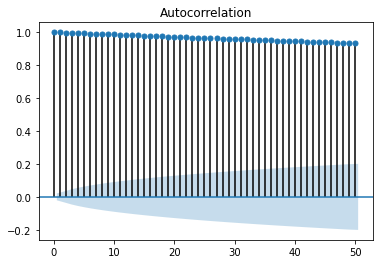

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(y, lags = 50)
pyplot.show()

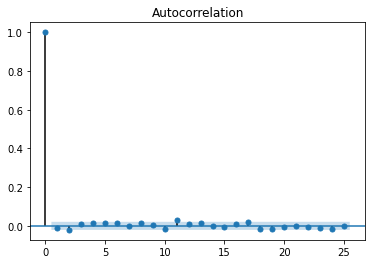

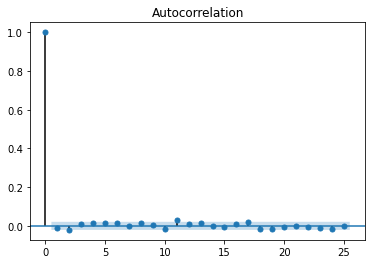

In [8]:
plot_acf(diffed_y, lags = 25)

In [11]:
# Use Random Forest Regressor to make predictions (remember that y is a shifted version of the time series)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [13]:
X = data1.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

In [14]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_predict = model.predict(X_test)

sqrt(mean_squared_error(y_test, y_predict))

0.4913979982662487